In [20]:
# Building a Regression Model to Predict Car Prices with TensorFlow

In [21]:
# Step 1: Load and Explore the Dataset
import pandas as pd

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/fenago/datasets/main/CooperUnionDataset.csv')

# Display the first few rows of the dataset
print(df.head())

# Display the column names
print(df.columns)

  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         C

In [22]:
# Step 2: Preprocessing the Data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Handle missing values if necessary
df = df.dropna()

# Separate input features and target variable
X = df.drop(columns=['MSRP'])  # MSRP is the target column
y = df['MSRP'].values

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Scale the numerical features (since regression often benefits from scaling)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Check the number of features
n_features = X.shape[1]

In [23]:
# Step 3: Split the Data
from sklearn.model_selection import train_test_split

# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
# Step 4: Define the Regression Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(n_features,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Single output neuron for regression (predicting price)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# Step 5: Train the Model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

In [26]:
# Step 6: Evaluate the Model
loss = model.evaluate(X_test, y_test, verbose=0)
print('Test Mean Squared Error: %.2f' % loss)

Test Mean Squared Error: 236753616.00


In [ ]:
# Step 7: Make Predictions
# Example prediction
import numpy as np
sample = np.array([[2011, 335, 6, 26, 19, 3916]])  # Example input with numerical features
sample_scaled = scaler.transform(sample)

# Predict the MSRP for the new car
prediction = model.predict(sample_scaled)
print('Predicted MSRP: %.2f' % prediction[0])

In [32]:
# Step 1: Summarizing the Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(8,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

# Summarize the model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 10)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 187 (748.00 B)

 Trainable params: 187 (748.00 B)

 Non-trainable params: 0 (0.00 B)

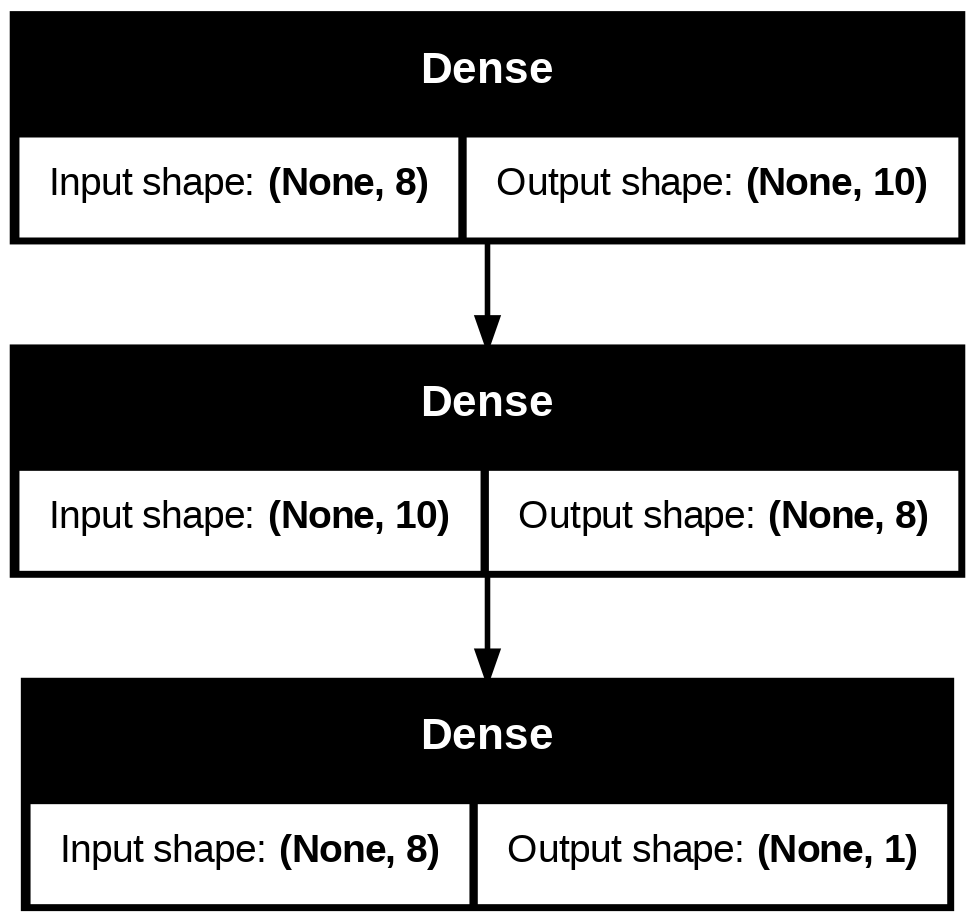

In [33]:
# Step 2: Plotting the Model Architecture
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

# Define the model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(8,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

# Plot the model and save it as an image
plot_model(model, 'model.png', show_shapes=True)

In [34]:
# Step 3: Saving the Model
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Create the dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)

# Determine the number of input features
n_features = X.shape[1]

# Define the model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')

# Fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)

# Save the model to a file
model.save('model.h5')

In [ ]:
# Step 4: Loading and Using a Saved Model
from sklearn.datasets import make_classification
from tensorflow.keras.models import load_model

# Create the dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)

# Load the model from file
model = load_model('model.h5')

# Make a prediction with a sample row of data
row = [1.91518414, 1.14995454, -1.52847073, 0.79430654]
yhat = model.predict([row])

# Output the prediction
print('Predicted: %.3f' % yhat[0])